# Neural Network Problem

## 1. Backpropagation

Implement the backpropagation algorithm that takes as input a network architecture ($d^{(0)}=d,d^{(1)},d^{(2)},\ldots,d^{(L)}=1$) and a set of examples $(\mathbf{x}_1,y_1),\ldots,(\mathbf{x}_N,y_N)$ where $\mathbf{x}_n \in \mathbb{R}^d$ and $y\in \mathbb{R}$, and produces as output the network weights. The algorithm should perform gradient descent on one example at a time, but should also keep track of the average error for all the examples in each epoch. Try your algorithm on the data set in

http://work.caltech.edu/data/in.dta

(the first two columns are the input and the third column is the output). Test the convergence behavior for architectures with one hidden layer ($L=2$) and $1$ to $5$ neurons ($d^{(1)}=1,2,3,4,5$), with combinations of the following parameters:

(i) The initial weight values chosen independently and randomly from the range (-0.02,0.02), the range (-0.2,0.2), or the range (-2,2).

(ii) The learning rate $\eta$ fixed at $0.01$, $0.1$ or $1$.

(iii) Sufficient number of epochs to get the training error to converge (within reason).

In [1]:
training_data = readdlm("in.dta")
test_data = readdlm("out.dta");

In [2]:
training_points = training_data[:,[1,2]]
training_labels = training_data[:,3];

In [3]:
#using PyPlot

function predict(x, W1, W2)
    x0 = [1; x']
    s1 = W1' * x0
    x1 = [1; tanh(s1)]
    s2 = W2' * x1
    x2 = tanh(s2)
    return x2
end

function back_propagation_gd(inputs, labels; init_coef = 0.02, eta=0.1, num_iteration=10000,plot=false)
    num_inputs = 2
    num_hidden = 5
    num_outputs = 1

    W1 = 2.0*init_coef*rand(num_inputs+1, num_hidden) - init_coef
    W2 = 2.0*init_coef*rand(num_hidden+1, num_outputs) - init_coef
    N = length(labels)
    eins = []
    for _ in 1:num_iteration
        ein = 0.0
        G1 = 0*W1
        G2 = 0*W2
        for idx in 1:N
            # forward propagation
            x = inputs[idx,:]
            y = labels[idx]
            x0 = [1; x']
            s1 = W1' * x0
            x1 = [1; tanh(s1)]
            s2 = W2' * x1
            x2 = tanh(s2)

            # backpropagation
            d2 = 2*(x2 - y)*(1-x2^2)
            d1 = (1 - x1 .* x1)[2:end] .* (W2*d2)[2:end]

            ein += (x2 - y)^2/N

            G1 += x0*d1' / N
            G2 += x1*d2' / N
        end
        push!(eins, ein[])
        W1 -= eta*G1
        W2 -= eta*G2
    end
#     figure(figsize=(5,5))
#     xin = 1:num_iteration
# #     plot(xin, eins)
#     loglog(xin, eins)
    if plot
        xin = 1:num_iteration
        return xin, eins
    end
    
    return W1, W2
end

back_propagation_gd (generic function with 1 method)

In [4]:
#using PyPlot

function back_propagation_sgd(inputs, labels; init_coef = 0.02, eta=0.1, num_iteration=10000, plot=false)
    num_inputs = 2
    num_hidden = 5
    num_outputs = 1

    W1 = 2.0*init_coef*rand(num_inputs+1, num_hidden) - init_coef
    W2 = 2.0*init_coef*rand(num_hidden+1, num_outputs) - init_coef
    N = length(labels)
    eins = []
    for _ in 1:num_iteration
        ein = 0.0
        G1 = 0*W1
        G2 = 0*W2
        batch_order = collect(1:N)
        shuffle!(batch_order)
        for idx in batch_order
            # forward propagation
            x = inputs[idx,:]
            y = labels[idx]
            x0 = [1; x']
            s1 = W1' * x0
            x1 = [1; tanh(s1)]
            s2 = W2' * x1
            x2 = tanh(s2)

            # backpropagation
            d2 = 2*(x2 - y)*(1-x2^2)
            d1 = (1 - x1 .* x1)[2:end] .* (W2*d2)[2:end]

            ein += (x2 - y)^2/N

#             G1 += x0*d1' / N
#             G2 += x1*d2' / N
            W1 -= eta*x0*d1'
            W2 -= eta*x1*d2'
        end
        push!(eins, ein[])

    end
#     figure(figsize=(5,5))
#     xin = 1:num_iteration
# #     plot(xin, eins)
#     loglog(xin, eins)
    if plot
        xin = 1:num_iteration
        return xin, eins
    end
    
    return W1, W2
end

back_propagation_sgd (generic function with 1 method)

In [5]:
using PyPlot

function compare_parameters(func)
    coeffs = [0.02, 0.2, 2.0]
    etas = [0.01, 0.1, 1.0]
    num_rows = length(coeffs)
    num_cols = length(etas)
    fig, axes = subplots(num_rows, num_cols, figsize=(15, 15))
    
    for i in 1:num_rows
        for j in 1:num_cols
            ax = axes[i, j]
            xin, eins = func(training_points, training_labels,
            init_coef = coeffs[i], eta=etas[j], num_iteration=10000, plot=true);
            ax[:loglog](xin, eins)
            ax[:set_title]("coef=$(coeffs[i]) eta= $(etas[j])")
        end
    end
end

compare_parameters (generic function with 1 method)

### Gradient Descent

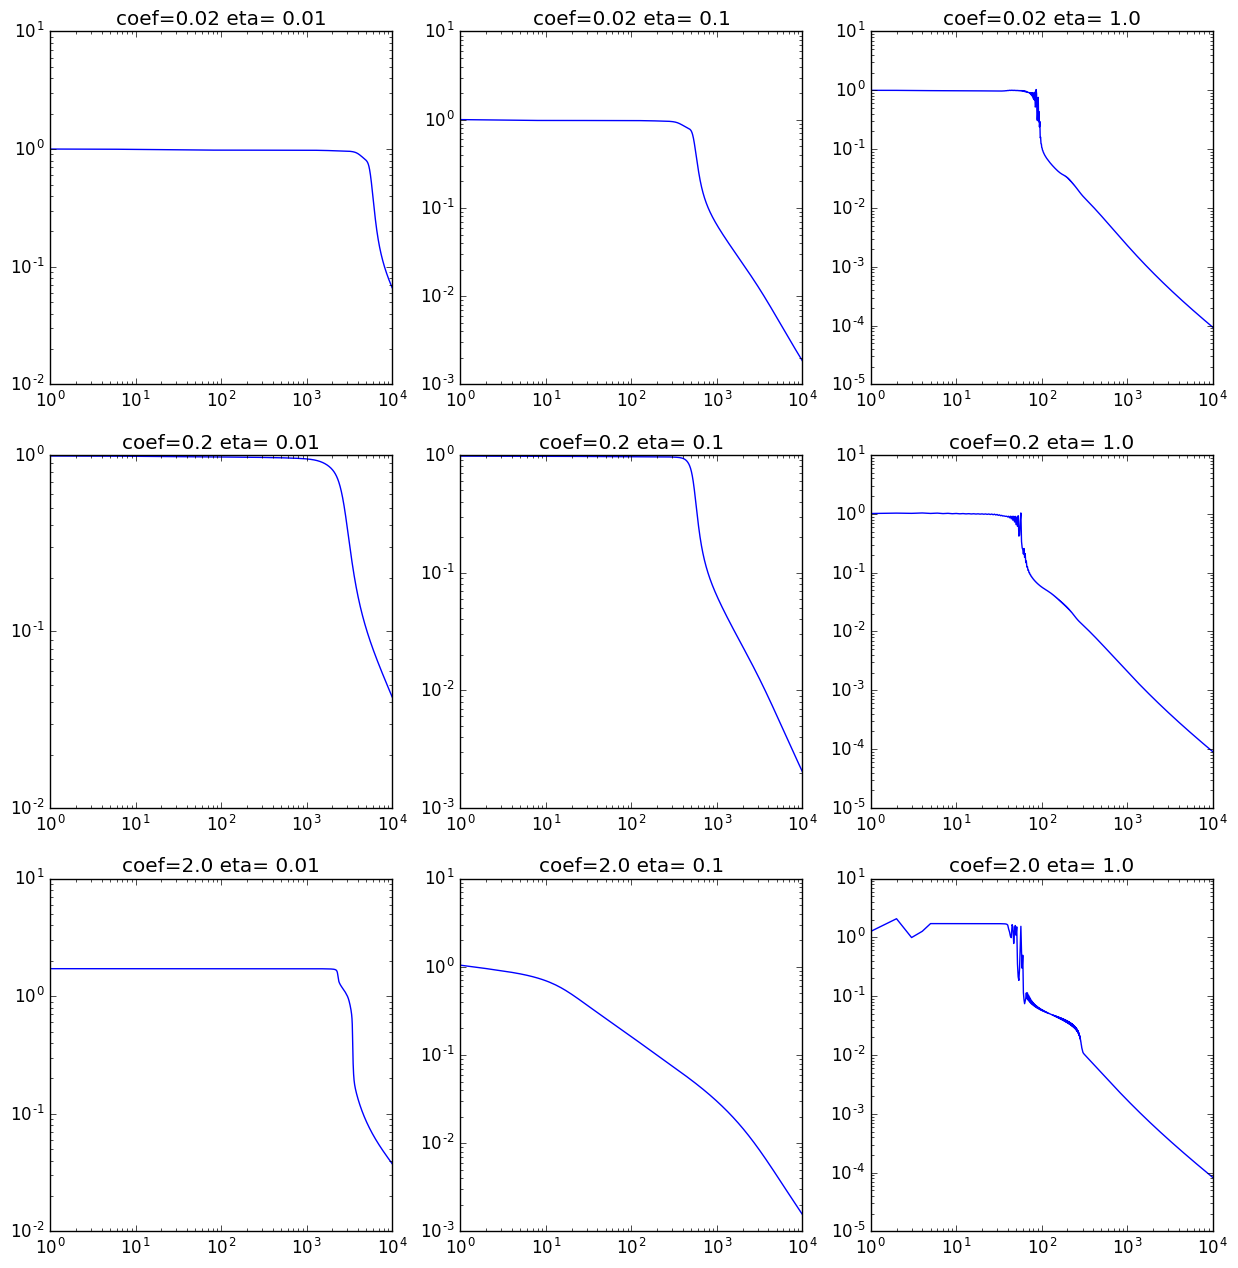

In [11]:
compare_parameters(back_propagation_gd)

### Stochastic Gradient Descent

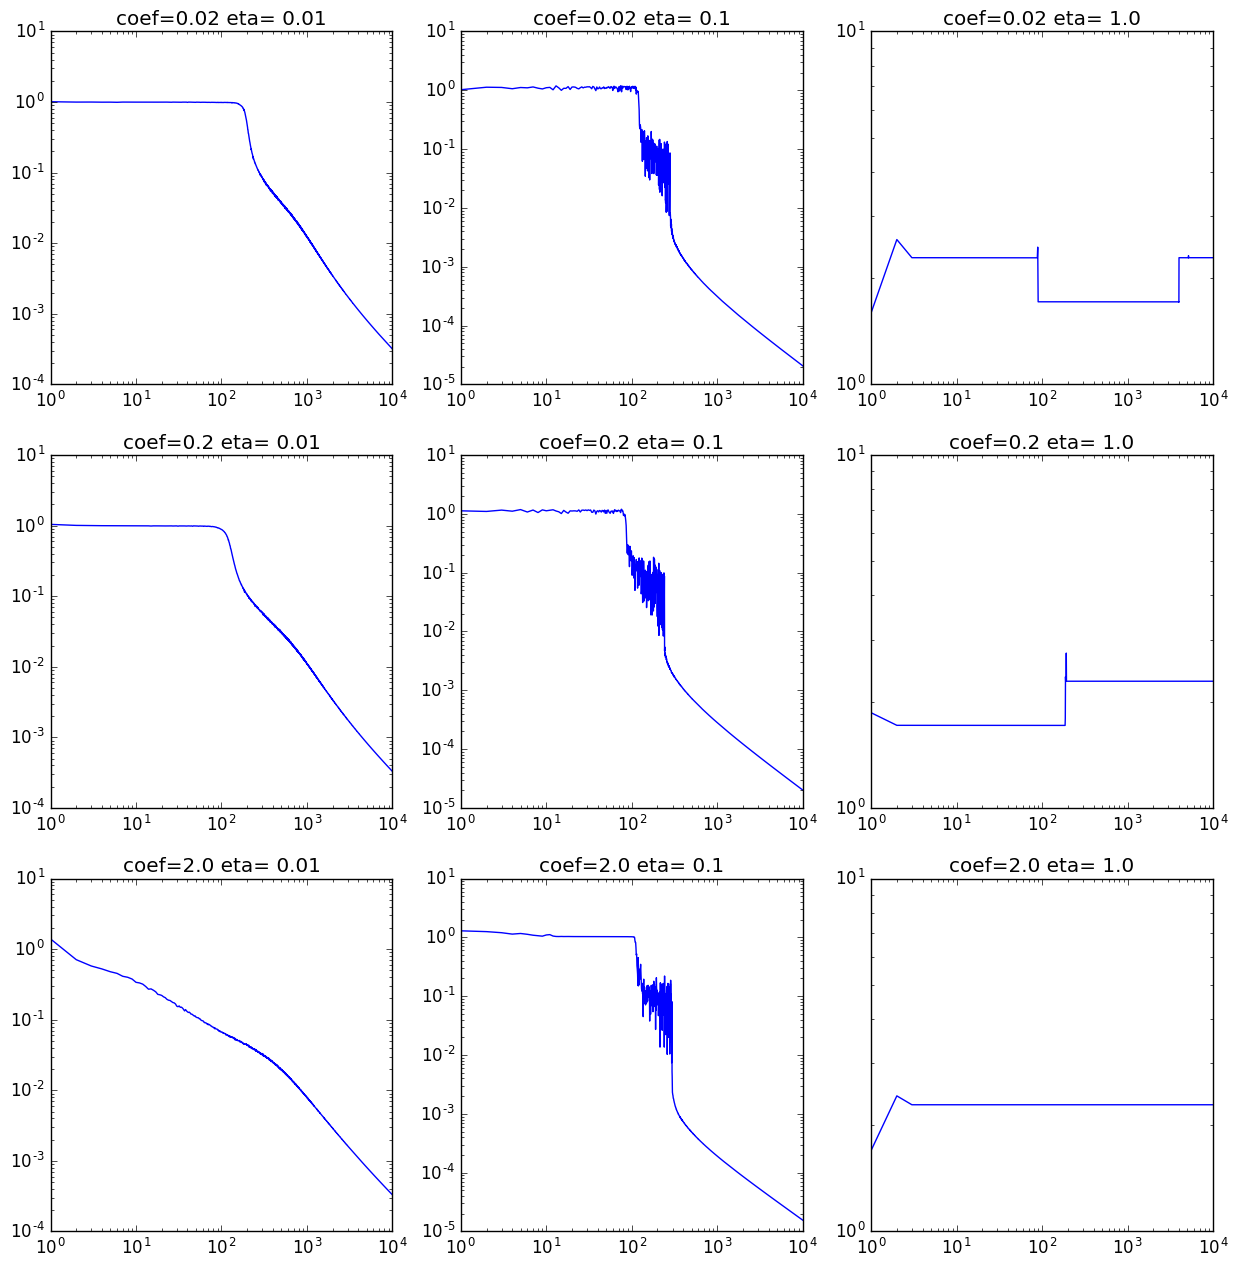

In [7]:
compare_parameters(back_propagation_sgd)

In [8]:
test_points=test_data[:,[1,2]]
test_labels=test_data[:,3];